## Sinusoidal位置编码

$\Large P_{k,2i}=sin(\frac{k}{10000^{\frac{2i}{d}}})$

$\Large P_{k,2i+1}=cos(\frac{k}{10000^{\frac{2i}{d}}})$


Text(0.5, 1.0, 'Inner product influenced by k')

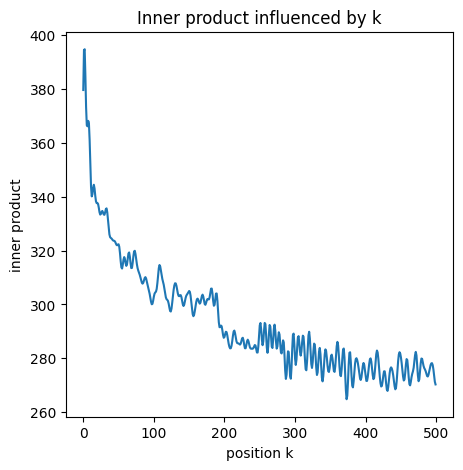

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 设定一个随机种子以确保结果的可复现性
np.random.seed(0)

# 初始化两个512维的向量q和k
dim = 768
q = np.random.rand(dim)
k = np.random.rand(dim)

# 计算q和k之间的内积分数，当k沿着位置从0逐步增加
inner_product_scores = []
positions = range(500)  # 从位置0到位置499

# 使用Sinusoidal位置编码
for pos in positions:
    # 生成位置编码
    encoding = np.array([
        [np.sin(pos / 10000 ** (2 * i / dim)), np.cos(pos / 10000 ** (2 * i / dim))]
        for i in range(dim // 2)
    ]).flatten()

    # 应用位置编码到k向量
    k_encoded = k + encoding

    # 计算q和编码后的k的内积分数
    score = np.dot(q, k_encoded)
    inner_product_scores.append(score)

# 生成内积分数的图表
plt.figure(figsize=(5,5))
plt.plot(positions, inner_product_scores)
plt.xlabel('position k')
plt.ylabel('inner product')
plt.title('Inner product influenced by k')


## 旋转位置编码 RoPE

### theta不变的位置编码

Text(0.5, 1.0, 'RoPE Inner product with unchanged theta')

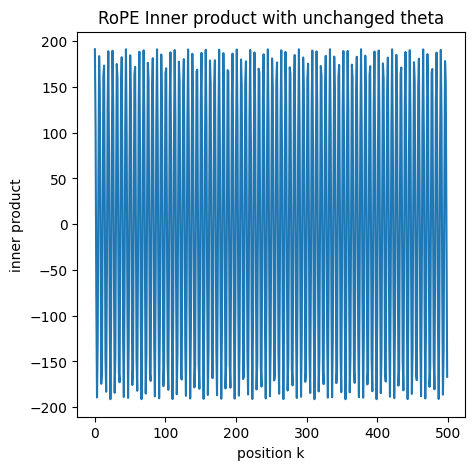

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch
# 设定一个随机种子以确保结果的可复现性
np.random.seed(0)

# 初始化两个512维的向量q和k
dim = 768
q = np.random.rand(dim)
k = np.random.rand(dim)

# 计算q和k之间的内积分数，当k沿着位置从0逐步增加
inner_product_scores = []
positions = range(500)  # 从位置0到位置499

# 生成旋转矩阵
theta = 1
m = 0
# q的旋转矩阵
q_matrix = np.zeros((dim,dim))
for position in range(dim):
  # 如果是偶数
  if position % 2 == 0:
    q_matrix[position][position] = np.cos(m * theta)
    q_matrix[position][position + 1] = -np.sin(m * theta)
  # 如果是奇数
  else:
    q_matrix[position][position - 1] = np.sin(m * theta)
    q_matrix[position][position] = np.cos(m * theta)
# 应用位置编码到q向量
q = np.dot(q_matrix,q)


# k的旋转矩阵
# 不同位置的旋转矩阵
for position in positions:
  # 每个位置都需要一个新的旋转矩阵
  k_matrix = np.zeros((dim,dim))
  for index in range(dim):
    # 如果是偶数
    if index % 2 == 0:
      k_matrix[index][index] = np.cos(position * theta)
      k_matrix[index][index + 1] = -np.sin(position * theta)
    # 如果是奇数
    else:
      k_matrix[index][index - 1] = np.sin(position * theta)
      k_matrix[index][index] = np.cos(position * theta)
  # 将旋转矩阵与 k 点乘
  k_new = np.dot(k_matrix,k)
  score = np.dot(q, k_new)
  inner_product_scores.append(score)
# 生成内积分数的图表
plt.figure(figsize=(5,5))
plt.plot(positions, inner_product_scores)
plt.xlabel('position k')
plt.ylabel('inner product')
plt.title('RoPE Inner product with unchanged theta')

### theta 改变的位置编码

Text(0.5, 1.0, 'RoPE Inner product with changed theta')

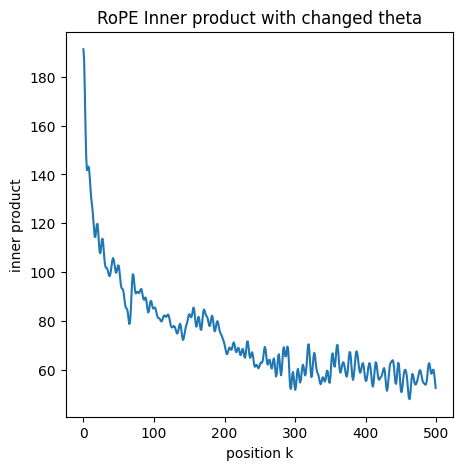

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch
# 设定一个随机种子以确保结果的可复现性
np.random.seed(0)

# 初始化两个512维的向量q和k
dim = 768
q = np.random.rand(dim)
k = np.random.rand(dim)

# 计算q和k之间的内积分数，当k沿着位置从0逐步增加
inner_product_scores = []
positions = range(500)  # 从位置0到位置499

# 生成旋转矩阵

m = 0
# q的旋转矩阵
q_matrix = np.zeros((dim,dim))
for position in range(dim):
  # 如果是偶数
  if position % 2 == 0:
    q_matrix[position][position] = np.cos(m * 1)
    q_matrix[position][position + 1] = -np.sin(m * 1)
  # 如果是奇数
  else:
    q_matrix[position][position - 1] = np.sin(m * 1)
    q_matrix[position][position] = np.cos(m * 1)
# 应用位置编码到q向量
q = np.dot(q_matrix,q)


# k的旋转矩阵
# 不同位置的旋转矩阵
for position in positions:
  # 每个位置都需要一个新的旋转矩阵
  k_matrix = np.zeros((dim,dim))
  for index in range(dim // 2):
    theta = 10000 ** (-index * 2 / dim)
    k_matrix[index * 2][index * 2] = np.cos(position * theta)
    k_matrix[index * 2][index * 2 + 1] = -np.sin(position * theta)
    k_matrix[index * 2 + 1][index * 2] = np.sin(position * theta)
    k_matrix[index * 2 + 1][index * 2 + 1] = np.cos(position * theta)
  # 将旋转矩阵与 k 点乘
  k_new = np.dot(k_matrix,k)
  score = np.dot(q, k_new)
  inner_product_scores.append(score)
# 生成内积分数的图表
plt.figure(figsize=(5,5))
plt.plot(positions, inner_product_scores)
plt.xlabel('position k')
plt.ylabel('inner product')
plt.title('RoPE Inner product with changed theta')

### 探索改变theta的base值对Q K内积的影响

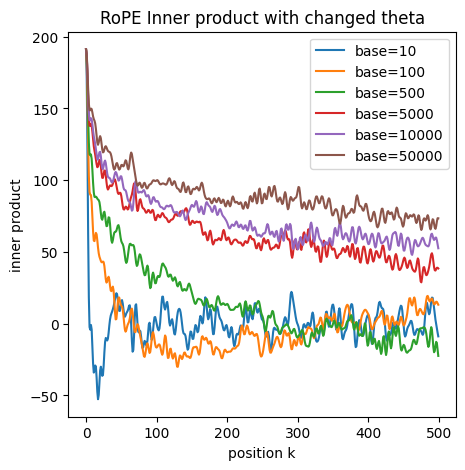

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch
# 设定一个随机种子以确保结果的可复现性
np.random.seed(0)

# 初始化两个512维的向量q和k
dim = 768
q = np.random.rand(dim)
k = np.random.rand(dim)

# 计算q和k之间的内积分数，当k沿着位置从0逐步增加
inner_product_scores = []
positions = range(500)  # 从位置0到位置499

# 生成旋转矩阵
m = 0
# q的旋转矩阵
q_matrix = np.zeros((dim,dim))
for position in range(dim):
  # 如果是偶数
  if position % 2 == 0:
    q_matrix[position][position] = np.cos(m * 1)
    q_matrix[position][position + 1] = -np.sin(m * 1)
  # 如果是奇数
  else:
    q_matrix[position][position - 1] = np.sin(m * 1)
    q_matrix[position][position] = np.cos(m * 1)
# 应用位置编码到q向量
q = np.dot(q_matrix,q)

base = [10,100,500,5000,10000,50000]
def calScore(q, base):
  scores = []
  for position in positions:
  # 生成旋转矩阵 每个位置都需要一个新的旋转矩阵
    k_matrix = np.zeros((dim,dim))
    for index in range(dim // 2):
      theta = base ** (-index * 2 / dim)
      k_matrix[index * 2][index * 2] = np.cos(position * theta)
      k_matrix[index * 2][index * 2 + 1] = -np.sin(position * theta)
      k_matrix[index * 2 + 1][index * 2] = np.sin(position * theta)
      k_matrix[index * 2 + 1][index * 2 + 1] = np.cos(position * theta)
    # 将旋转矩阵与 k 点乘
    k_new = np.dot(k_matrix,k)
    score = np.dot(q, k_new)
    scores.append(score)
    # inner_product_scores.append(score)
  return scores
scores = []
for i in range(len(base)):
  scores.append(calScore(q,base[i]))

# 生成内积分数的图表
plt.figure(figsize=(5,5))
for i,score in enumerate(scores):
  plt.plot(positions,score,label=f'base={base[i]}')
plt.xlabel('position k')
plt.ylabel('inner product')
plt.title('RoPE Inner product with changed theta')
plt.legend()